Titanic - Logistic Machine Learning from Disaster : Logistic Regression Using famous Titanic dataset to attempt to predict Weather or not a passenger survived 
based on their features 


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [106]:
## Read data from Titanic training data into dataframe using pandas
titanic_train=pd.read_csv('titan_train.csv')
titanic_test=pd.read_csv('titan_test.csv')

In [107]:
## Check data into dataframe
## Survived=0 means not survived else survived 
## Pclass -> passenger class (class -1 ,2,3)
##Sibsp -> number of spouse and siblings, 0- no spouse or siblings , 1- means one spouse or siblings
##Parch -> means number of parents/childrens
titanic_train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


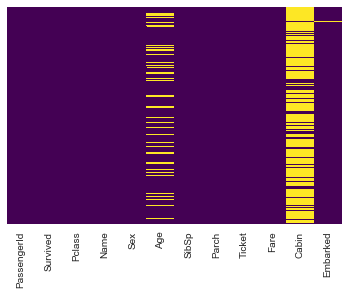

In [108]:
## See the number of missing values on each column using heatamp in seaborn
## yticklabels -> Make it False as there is nothing to lable in Y-axis
##Cbar=False -> we are not going to use color bar here
##Yellow color= Makred it for the data which has null value (isnull is True)
## Missing information is huge in column 'Cabin' and small amount of missing information in column 'Age'
sns.heatmap(data=titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

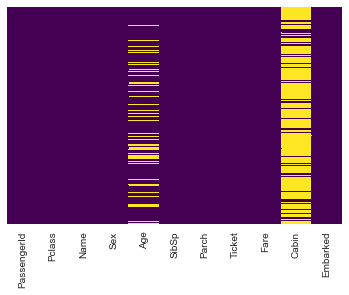

In [109]:
sns.heatmap(data=titanic_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [110]:
## Get the column names
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

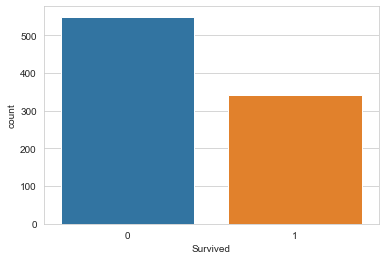

In [111]:
## Analyze the Training data to see how many are survived or not survived using count plot with column 'Survived'
## Set style to white grid to see more clear graph
##Not survived is more than survived .
sns.set_style('whitegrid')
sns.countplot(data=titanic_train,x='Survived')

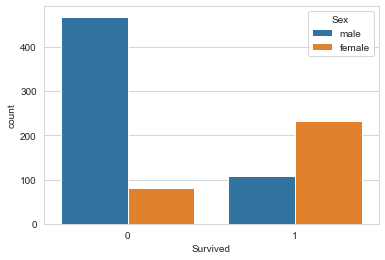

In [112]:
## Check the survival ratio using countplot alongwith hue=sex
## looks like female are more survived than Male.Male are more not survived  than Female
sns.countplot(data=titanic_train,x='Survived',hue='Sex')

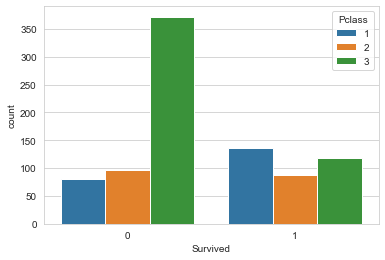

In [113]:
## count plot for 'survived' column , this time hue='Pclass'
## Class -3 (lower calss) not survived much than other classes
##Class- 1(Highest Class) survived more than other classes
sns.countplot(data=titanic_train,x='Survived',hue='Pclass')

C:\Users\ss186070\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ss186070\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


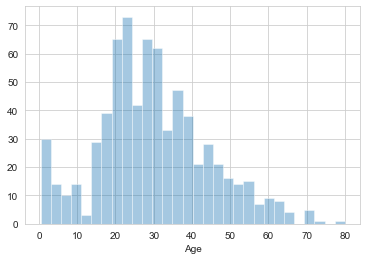

In [114]:
## See the number of passengers onbroaded into ship based as per the 'Ages' using distplot 
## No need Kde here
## looks like more passengers's age  between age 20 to 35 then passengers between 0 to 10 age
sns.distplot(titanic_train['Age'],kde=False,bins=30)

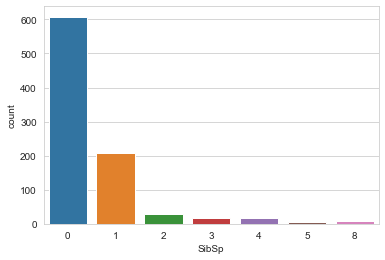

In [115]:
## Plot the graph based on the numbers of passengers on board using 'SibSp' (Sibling and spouse)
## looks like more passengers are on boarded into ship whose has not sibling or spouse
sns.countplot(data=titanic_train,x='SibSp')

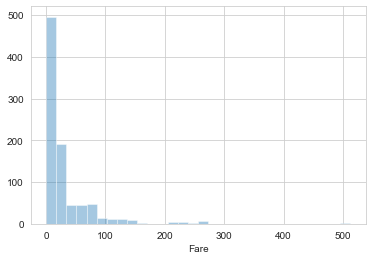

In [116]:
## Check the passengers count based on the ticket
##Highest number of passengers are on boarded with chip price
sns.distplot(titanic_train['Fare'],kde=False,bins=30)

******* CLEAN Data **** 

In [117]:
## Observered age column has few missing data hence have to fill with average age  of passenger 
## based on the Pclass(passenger Class)
##Step 1:  Lets check the average age of each Pcalss. result will be in series hence converted into dataframe and covert
##Index to column by reset_index()

avg_age_df=pd.DataFrame(titanic_train.groupby('Pclass').Age.mean()).reset_index()


In [118]:
avg_age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
Pclass    3 non-null int64
Age       3 non-null float64
dtypes: float64(1), int64(1)
memory usage: 176.0 bytes


In [119]:
titanic_train[titanic_train['Age'].isnull()][['PassengerId','Age','Pclass']]

,PassengerId,Age,Pclass
5,6,NaN,3
17,18,NaN,2
19,20,NaN,3
26,27,NaN,3
28,29,NaN,3
...,...,...,...
859,860,NaN,3
863,864,NaN,3
868,869,NaN,3
878,879,NaN,3


In [120]:
titanic_train[(titanic_train['Age'].isnull()==True) & (titanic_train['Pclass']==1)][['PassengerId','Age','Pclass']]

,PassengerId,Age,Pclass
31,32,NaN,1
55,56,NaN,1
64,65,NaN,1
166,167,NaN,1
168,169,NaN,1
185,186,NaN,1
256,257,NaN,1
270,271,NaN,1
284,285,NaN,1
295,296,NaN,1


In [121]:
avg_age_df.head()

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


In [122]:
age_1=float(avg_age_df[avg_age_df['Pclass']==3]['Age'])

In [123]:
avg_age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
Pclass    3 non-null int64
Age       3 non-null float64
dtypes: float64(1), int64(1)
memory usage: 176.0 bytes


In [124]:
age_1

25.14061971830986

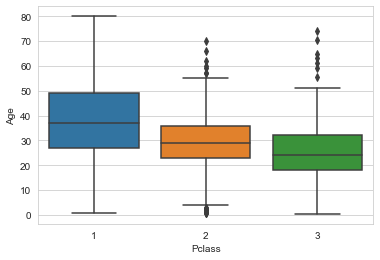

In [125]:
## Setp 2: Other way to see the average age per Pclass using BoxPlot.Lets see using seaborn
sns.boxplot(data=titanic_train,x='Pclass',y='Age')

In [126]:
##Step 3
## Define a function which can calculate average age based on Pclass
def avergae_age(cols):
    df_age=cols[0]
    df_pclass=cols[1]
    age_1=int(avg_age_df[avg_age_df['Pclass']==1]['Age'])
    age_2=int(avg_age_df[avg_age_df['Pclass']==2]['Age'])
    age_3=int(avg_age_df[avg_age_df['Pclass']==3]['Age'])
    if pd.isnull(df_age):
        if df_pclass == 1:
            return age_1
        elif df_pclass == 2:
            return age_2
        else:
            return age_3
    else:
        return df_age
        

In [127]:
## Step 4 : use the above function into titanic_train data frame to set the average age into age which having NULL value
titanic_train['Age']=titanic_train[['Age','Pclass']].apply(avergae_age,axis=1)
titanic_test['Age']=titanic_test[['Age','Pclass']].apply(avergae_age,axis=1)

In [128]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [129]:
titanic_train[titanic_train['PassengerId']==6][['PassengerId','Age','Pclass']]

,PassengerId,Age,Pclass
5,6,25.0,3


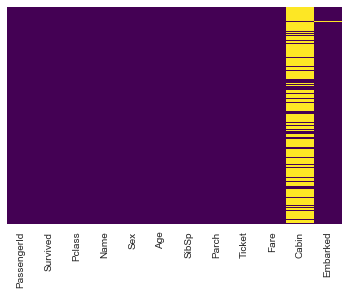

In [130]:
###Check the Age value weather it set properly for Null
sns.heatmap(data=titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

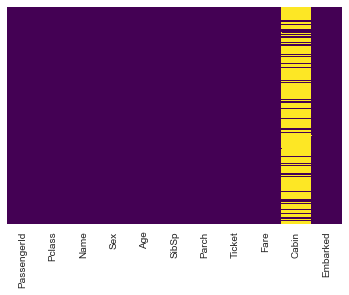

In [131]:
sns.heatmap(data=titanic_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [132]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [133]:
## Drop the cabin column from dataframe as there are lots of rows with missing value
titanic_train.drop('Cabin',axis=1,inplace=True)
titanic_test.drop('Cabin',axis=1,inplace=True)

In [134]:
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [135]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

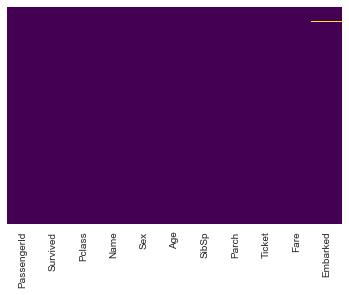

In [136]:
sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

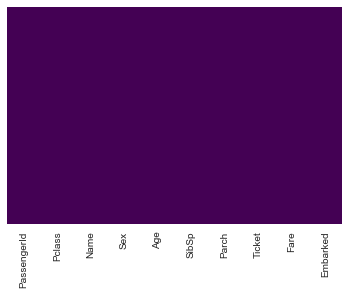

In [137]:
sns.heatmap(titanic_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [138]:
##remove the rows which has NAN value
##Looks like Embarked columns has few NAN values
titanic_train.dropna(inplace=True)

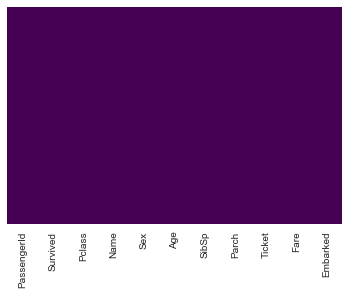

In [139]:
sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [140]:
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [141]:
titanic_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S


LETS convert the categorical features into dummy variable so that ML will be trained properly

In [142]:
sex=pd.get_dummies(titanic_train['Sex'],drop_first=True)

In [143]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [144]:
sex_test=pd.get_dummies(titanic_test['Sex'],drop_first=True)

In [145]:
sex_test

,male
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [146]:
embark=pd.get_dummies(titanic_train['Embarked'],drop_first=True)

In [147]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [148]:
embark_test=pd.get_dummies(titanic_test['Embarked'],drop_first=True)

In [149]:
embark_test

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
413,0,1
414,0,0
415,0,1
416,0,1


In [150]:
titanic_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [151]:
## Concat the above dummy dataframe into existing train dataframe
titanic_train=pd.concat([titanic_train,sex,embark],axis=1)

In [152]:
titanic_test=pd.concat([titanic_test,sex_test,embark_test],axis=1)

In [153]:
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Q,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,0,0


In [154]:
titanic_test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S,1,0,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q,0,1,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S,1,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C,0,0,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S,1,0,1


In [155]:
## Drop Sex,Embarked columns from dataframe
titanic_train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [156]:
titanic_test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [157]:
titanic_train.head(20)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
5,6,0,3,25.0,0,0,8.4583,1,1,0
6,7,0,1,54.0,0,0,51.8625,1,0,1
7,8,0,3,2.0,3,1,21.0750,1,0,1
8,9,1,3,27.0,0,2,11.1333,0,0,1
9,10,1,2,14.0,1,0,30.0708,0,0,0


In [158]:
titanic_test.head(20)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1
5,897,3,14.0,0,0,9.2250,1,0,1
6,898,3,30.0,0,0,7.6292,0,1,0
7,899,2,26.0,1,1,29.0000,1,0,1
8,900,3,18.0,0,0,7.2292,0,0,0
9,901,3,21.0,2,0,24.1500,1,0,1


In [159]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
male           889 non-null uint8
Q              889 non-null uint8
S              889 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.2 KB


In [160]:
## Remove the passengerId from train data

titanic_train.drop('PassengerId',axis=1,inplace=True)

In [161]:
titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [162]:
titanic_train.head(10)


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,25.0,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,2.0,3,1,21.0750,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0


In [163]:
titanic_test.head(10)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1
5,897,3,14.0,0,0,9.2250,1,0,1
6,898,3,30.0,0,0,7.6292,0,1,0
7,899,2,26.0,1,1,29.0000,1,0,1
8,900,3,18.0,0,0,7.2292,0,0,0
9,901,3,21.0,2,0,24.1500,1,0,1


In [164]:
##Capture the passenger
titanic_test_passid=titanic_test['PassengerId']

In [165]:
type(titanic_test_passid)

pandas.core.series.Series

In [166]:
titanic_test_passid

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [167]:
##Convert series into dataframe
titanic_test_passid=titanic_test_passid.to_frame(name='PassengerId')

In [168]:
##Check the datatype
type(titanic_test_passid)

pandas.core.frame.DataFrame

In [169]:
titanic_test.head(10)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1
5,897,3,14.0,0,0,9.2250,1,0,1
6,898,3,30.0,0,0,7.6292,0,1,0
7,899,2,26.0,1,1,29.0000,1,0,1
8,900,3,18.0,0,0,7.2292,0,0,0
9,901,3,21.0,2,0,24.1500,1,0,1


In [170]:
titanic_test_passid.head(10)

,PassengerId
0,892
1,893
2,894
3,895
4,896
5,897
6,898
7,899
8,900
9,901


In [171]:
titanic_test.drop('PassengerId',axis=1,inplace=True)

In [172]:
titanic_train.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,25.0,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,2.0,3,1,21.0750,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0


In [173]:
titanic_test.head(10)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
5,3,14.0,0,0,9.2250,1,0,1
6,3,30.0,0,0,7.6292,0,1,0
7,2,26.0,1,1,29.0000,1,0,1
8,3,18.0,0,0,7.2292,0,0,0
9,3,21.0,2,0,24.1500,1,0,1


In [174]:
titanic_test_passid.head(10)

,PassengerId
0,892
1,893
2,894
3,895
4,896
5,897
6,898
7,899
8,900
9,901


In [175]:
X=titanic_train.drop('Survived',axis=1)
y=titanic_train['Survived']

In [176]:
type(X)


pandas.core.frame.DataFrame

In [177]:
type(y)

pandas.core.series.Series

In [178]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,25.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [179]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

CREATE LOGISTIC REGRESSION MODEL
FIT THE TRAINING DATA
PREDICT WITH TEST DATA

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [182]:
from sklearn.linear_model import LogisticRegression

In [183]:
##Create object of logistic regression
logmod=LogisticRegression()

In [184]:
type(X_test)

pandas.core.frame.DataFrame

In [185]:
logmod.fit(X_train,y_train)

C:\Users\ss186070\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [186]:
predictions=logmod.predict(X_test)

In [187]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [188]:
X_test.head(10)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
511,3,25.0,0,0,8.0500,1,0,1
613,3,25.0,0,0,7.7500,1,1,0
615,2,24.0,1,2,65.0000,0,0,1
337,1,41.0,0,0,134.5000,0,0,0
718,3,25.0,0,0,15.5000,1,1,0
152,3,55.5,0,0,8.0500,1,0,1
826,3,25.0,0,0,56.4958,1,0,1
418,2,30.0,0,0,13.0000,1,0,1
614,3,35.0,0,0,8.0500,1,0,1
241,3,25.0,1,0,15.5000,0,1,0


Evaluate Model

In [189]:
from sklearn.metrics import classification_report

In [190]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       107
           1       0.83      0.63      0.72        71

    accuracy                           0.80       178
   macro avg       0.81      0.77      0.78       178
weighted avg       0.81      0.80      0.80       178



In [191]:
from sklearn.metrics import confusion_matrix

In [192]:
print(confusion_matrix(y_test,predictions))

[[98  9]
 [26 45]]


In [193]:
titanic_test.head(10)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
5,3,14.0,0,0,9.2250,1,0,1
6,3,30.0,0,0,7.6292,0,1,0
7,2,26.0,1,1,29.0000,1,0,1
8,3,18.0,0,0,7.2292,0,0,0
9,3,21.0,2,0,24.1500,1,0,1


In [194]:
##Check null values in entire dataframe columns wether 
titanic_test.isnull().values.any()

True

In [195]:
titanic_test.isnull().sum().sum()

1

In [196]:
##Check which colum has null

nan_cols = [i for i in titanic_test.columns if titanic_test[i].isnull().any()]


In [197]:
nan_cols

['Fare']

In [198]:
titanic_test[titanic_test['Fare'].isnull()==True][['Pclass','Age','SibSp','Parch','Fare','male','Q','S']]

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
152,3,60.5,0,0,NaN,1,0,1


In [199]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass    418 non-null int64
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      417 non-null float64
male      418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.7 KB


In [200]:
titanic_test.head(10)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
5,3,14.0,0,0,9.2250,1,0,1
6,3,30.0,0,0,7.6292,0,1,0
7,2,26.0,1,1,29.0000,1,0,1
8,3,18.0,0,0,7.2292,0,0,0
9,3,21.0,2,0,24.1500,1,0,1


In [204]:
##Get the average value of fare whose Pclass=3
test_fare_mean=titanic_test[titanic_test['Pclass']==3]['Fare'].mean()

In [205]:
test_fare_mean

12.459677880184334

In [207]:
titanic_test['Fare'].fillna(value=test_fare_mean,inplace=True)
    

In [208]:
##Check any column has Nan Value
nan_cols = [i for i in titanic_test.columns if titanic_test[i].isnull().any()]

In [209]:
nan_cols

[]

In [210]:
test_predictions=logmod.predict(titanic_test)

In [211]:
test_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [213]:
type(test_predictions)

numpy.ndarray

In [215]:
##Convert the prediction array into dataframe
test_Survived_result=pd.DataFrame(test_predictions,columns=['predictions'])

In [218]:
test_Survived_result.shape

(418, 1)

In [219]:
titanic_test_passid.shape

(418, 1)

In [222]:
##Concat the prediction and passid into one dataframe
titanic_test_final_prediction=pd.concat([titanic_test_passid,test_Survived_result],axis=1)

In [223]:
## This is fina prediction for passengerId
titanic_test_final_prediction

,PassengerId,predictions
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [225]:
titan_test_actual=pd.read_csv('titan_gender_submission.csv')

In [226]:
titan_test_actual

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
